In [1]:
import os

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Final Exam Part B

## Part A - Model Training and Evaluation

### Exploratory Data Analysis

In [2]:
# Load the dataset
def load_data():
  base_dir = 'data'
  X_train = pd.read_csv(f'{base_dir}/x_train.csv')
  y_train = pd.read_csv(f'{base_dir}/y_train.csv')
  X_test = pd.read_csv(f'{base_dir}/x_test.csv')
  y_test = pd.read_csv(f'{base_dir}/y_test.csv')

  # Convert the target variable to 1-d array
  y_train = y_train.values.ravel()
  y_test = y_test.values.ravel()

  return X_train, y_train, X_test, y_test


# Visualize the first 20 images
def visualize_data(X_train):
  fig, axes = plt.subplots(2, 10, figsize=(20, 5))
  axes = axes.flatten()
  for i in range(20):
    axes[i].imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i].axis('off')
  plt.show()

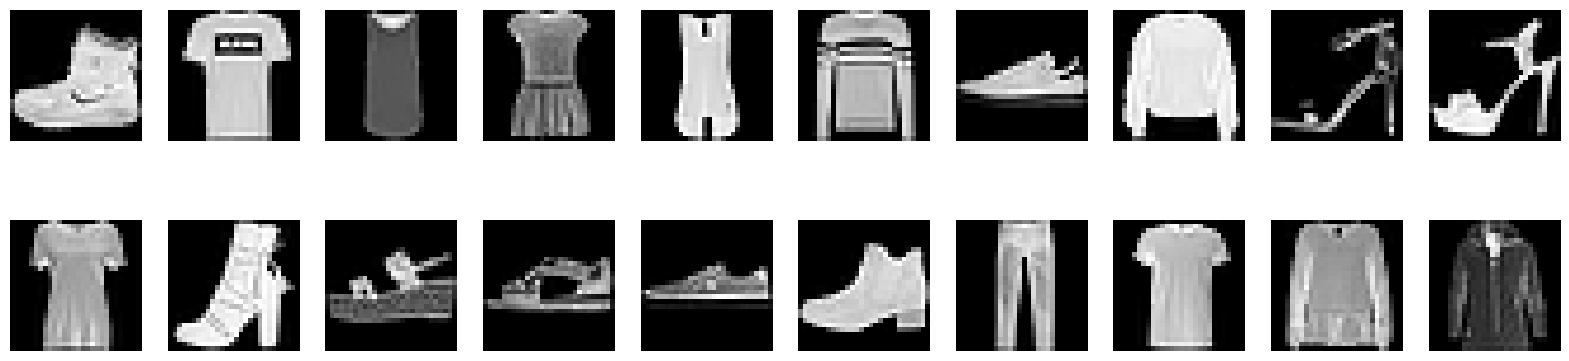

In [3]:
X_train, y_train, X_test, y_test = load_data()
visualize_data(X_train)

### Train a Baseline Model

I chose a decision tree as the baseline model.

The reason is that decision trees are simple and easy to understand. They create clear decision boundaries by splitting data based on features. This makes them suitable as a starting point for comparison. Additionally, they train quickly and perform well on small to medium-sized datasets, which fits the task requirements.

A Decision Tree is considered a "shallow classifier" because it has a single structure and generates simple and interpretable decision boundaries. Unlike deep models, it does not learn complex hierarchical patterns or representations.

In [4]:
# Create a directory to save the models
os.makedirs('./models', exist_ok=True)


# Train a baseline decision tree model
def train_baseline_model(X, y):
  # Init a decision tree model
  model = DecisionTreeClassifier(random_state=42)

  # Use 5-fold cross validation to evaluate the model
  scores = cross_validate(model, X, y, cv=5,
                          scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], n_jobs=-1)

  print('Baseline Decision Tree Model')
  print(f'Average Training Accuracy: {np.mean(scores["test_accuracy"]):.4f}')
  print(f'Average Training Precision: {np.mean(scores["test_precision_weighted"]):.4f}')
  print(f'Average Training Recall: {np.mean(scores["test_recall_weighted"]):.4f}')
  print(f'Average Training F1 Score: {np.mean(scores["test_f1_weighted"]):.4f}')

  model.fit(X, y)
  return model

In [5]:
# Train the baseline model
baseline_model = train_baseline_model(X_train, y_train)

# Dump the baseline model to a file
joblib.dump(baseline_model, './models/baseline_model.joblib')

Baseline Decision Tree Model
Average Training Accuracy: 0.8334
Average Training Precision: 0.8336
Average Training Recall: 0.8334
Average Training F1 Score: 0.8334


['./models/baseline_model.joblib']

### Train a Bagging Model

In [6]:
def train_bagging_model(X, y, base_model):
  # Init a bagging classifier with the base model
  model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

  # Use 5-fold cross validation to evaluate the model
  scores = cross_validate(model, X, y, cv=5,
                          scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], n_jobs=-1)

  print('\nBagging Model')
  print(f'Average Training Accuracy: {np.mean(scores["test_accuracy"]):.4f}')
  print(f'Average Training Precision: {np.mean(scores["test_precision_weighted"]):.4f}')
  print(f'Average Training Recall: {np.mean(scores["test_recall_weighted"]):.4f}')
  print(f'Average Training F1 Score: {np.mean(scores["test_f1_weighted"]):.4f}')

  model.fit(X, y)
  return model

In [7]:
# Load the baseline model from the file
baseline_model = joblib.load('./models/baseline_model.joblib')

# Train the bagging model
bagging_model = train_bagging_model(X_train, y_train, baseline_model)

# Dump the bagging model to a file
joblib.dump(bagging_model, './models/bagging_model.joblib')


Bagging Model
Average Training Accuracy: 0.8881
Average Training Precision: 0.8881
Average Training Recall: 0.8881
Average Training F1 Score: 0.8880


['./models/bagging_model.joblib']

### Train a Boosting Model

In [8]:
def train_boosting_model(X, y, base_model):
  # Init a boosting classifier with the base model
  model = AdaBoostClassifier(estimator=base_model, n_estimators=10, random_state=42, algorithm='SAMME')

  # Use 5-fold cross validation to evaluate the model
  scores = cross_validate(model, X, y, cv=5,
                          scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], n_jobs=-1)

  print('\nBoosting Model')
  print(f'Average Training Accuracy: {np.mean(scores["test_accuracy"]):.4f}')
  print(f'Average Training Precision: {np.mean(scores["test_precision_weighted"]):.4f}')
  print(f'Average Training Recall: {np.mean(scores["test_recall_weighted"]):.4f}')
  print(f'Average Training F1 Score: {np.mean(scores["test_f1_weighted"]):.4f}')

  model.fit(X, y)
  return model

In [9]:
# Load the baseline model from the file
baseline_model = joblib.load('./models/baseline_model.joblib')

# Train the boosting model
boosting_model = train_boosting_model(X_train, y_train, baseline_model)

# Dump the boosting model to a file
joblib.dump(boosting_model, './models/boosting_model.joblib')


Boosting Model
Average Training Accuracy: 0.8311
Average Training Precision: 0.8314
Average Training Recall: 0.8311
Average Training F1 Score: 0.8312


['./models/boosting_model.joblib']

### Test and Compare the Models

In [10]:
# Test the decision tree model
def test_decision_tree_model(model, X, y, model_name):
  y_pred = model.predict(X)
  print(f'{model_name} Testing Classification Report\n')
  print(classification_report(y, y_pred))

In [11]:
# Test the baseline model
baseline_model = joblib.load('./models/baseline_model.joblib')
test_decision_tree_model(baseline_model, X_test, y_test, 'Baseline Model')

Baseline Model Testing Classification Report

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2000
           1       0.90      0.86      0.88      1000
           2       0.80      0.81      0.80      2000
           3       0.88      0.90      0.89      2000
           4       0.82      0.81      0.82      3000

    accuracy                           0.83     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.83      0.83      0.83     10000



In [12]:
# Test the bagging model
bagging_model = joblib.load('./models/bagging_model.joblib')
test_decision_tree_model(bagging_model, X_test, y_test, 'Bagging Model')

Bagging Model Testing Classification Report

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2000
           1       0.96      0.94      0.95      1000
           2       0.86      0.86      0.86      2000
           3       0.93      0.95      0.94      2000
           4       0.87      0.87      0.87      3000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.89      0.89      0.89     10000



In [13]:
# Test the boosting model
boosting_model = joblib.load('./models/boosting_model.joblib')
test_decision_tree_model(boosting_model, X_test, y_test, 'Boosting Model')

Boosting Model Testing Classification Report

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2000
           1       0.90      0.87      0.88      1000
           2       0.81      0.81      0.81      2000
           3       0.88      0.89      0.89      2000
           4       0.82      0.82      0.82      3000

    accuracy                           0.83     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.83      0.83      0.83     10000



#### Summary

The Bagging model performed the best among the three models, achieving the highest accuracy (0.89), precision, recall, and F1-scores across all labels. The Baseline and Boosting models both had similar performance, with an overall accuracy of 0.83.

Bagging performed better because it reduces variance by combining multiple models, which helps in stabilizing predictions. In contrast, Boosting focuses on correcting errors, but the Baseline model's performance suggests there were fewer errors to correct, limiting its potential.

## Part B - Guessing the Mystery Label

### Train a MLP Model

In [14]:
def evaluate_mlp_model(model, X, y):
  y_pred = model.predict(X)
  print(f'MLP Classification Report\n')
  print(classification_report(y, y_pred))


def train_mlp_model(X, y):
  # Normalize the data with z-score
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Init a MLP model
  model = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=100, random_state=42)

  # Train the model
  model.fit(X_scaled, y)

  # Print the evaluation metrics
  evaluate_mlp_model(model, X_scaled, y)

  return model, scaler

In [15]:
# Train the MLP model
mlp_model, mlp_scaler = train_mlp_model(X_train, y_train)

# Dump the MLP model and the scaler to files
joblib.dump(mlp_model, './models/mlp_model.joblib')
joblib.dump(mlp_scaler, './models/mlp_scaler.joblib')

MLP Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12000
           1       1.00      1.00      1.00      6000
           2       1.00      0.99      1.00     12000
           3       1.00      1.00      1.00     12000
           4       1.00      1.00      1.00     18000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



['./models/mlp_scaler.joblib']

### Test the MLP Model

In [16]:
# Load the MLP model from the file
mlp_model = joblib.load('./models/mlp_model.joblib')

# Normalize the data with z-score
mlp_scaler = joblib.load('./models/mlp_scaler.joblib')
X_test_scaled = mlp_scaler.transform(X_test)

# Evaluate the MLP model
evaluate_mlp_model(mlp_model, X_test_scaled, y_test)

MLP Classification Report

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2000
           1       0.98      0.96      0.97      1000
           2       0.90      0.91      0.91      2000
           3       0.96      0.97      0.97      2000
           4       0.93      0.91      0.92      3000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



#### Summary

The MLP outperformed all three models, achieving the highest accuracy (0.93) and consistently strong precision, recall, and F1-scores across all labels. Its ability to learn complex patterns likely contributed to this superior performance compared to the Baseline, Bagging, and Boosting models.

### Generate Embedding Matrix

In [17]:
def get_hidden_layer_activations(model, X, layer_index):
  """Calculate the activations of a specified hidden layer.

  Parameters:
  - model: Trained instance of sklearn.neural_network.MLPClassifier.
  - X: Input data, numpy array of shape (n_samples, n_features).
  - layer_index: Index of the hidden layer for which to compute activations.

  Returns:
  - Activations of the specified hidden layer, numpy array of shape (n_samples, n_units_in_layer).
  """
  if layer_index < 0 or layer_index >= len(model.coefs_) - 1:
    raise ValueError("Invalid layer_index.")

  # Forward propagate through the network until the specified layer
  activations = X
  for i in range(layer_index + 1):
    activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
    if i < len(model.coefs_) - 1:
      activations = np.maximum(0, activations)

  return activations

In [18]:
# Load the MLP model from the file
mlp_model = joblib.load('./models/mlp_model.joblib')

# Normalize the data with z-score
mlp_scaler = joblib.load('./models/mlp_scaler.joblib')
X_test_scaled = mlp_scaler.transform(X_test)

# Retrieve activations for the 3rd hidden layer
embeddings = get_hidden_layer_activations(mlp_model, X_test_scaled, 2)

print(f'Embeddings Shape: {embeddings.shape}')

Embeddings Shape: (10000, 64)


### PCA & LDA

In [19]:
# Reduce the dimensionality of the embeddings to 2D using PCA and LDA
def reduce_to_2d(embeddings, y_test):
  # PCA
  pca = PCA(n_components=2)
  pca_reduced = pca.fit_transform(embeddings)

  # LDA
  lda = LDA(n_components=2)
  lda_reduced = lda.fit_transform(embeddings, y_test)

  return pca_reduced, lda_reduced


# Plot 2D visualization
def plot_2d(pca_reduced, lda_reduced, y):
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))

  for label in np.unique(y):
    axes[0].scatter(pca_reduced[y == label, 0], pca_reduced[y == label, 1], label=f"Label {int(label)}", alpha=0.5)
    axes[1].scatter(lda_reduced[y == label, 0], lda_reduced[y == label, 1], label=f"Label {int(label)}", alpha=0.5)

  axes[0].set_title('PCA Visualization')
  axes[1].set_title('LDA Visualization')

  axes[0].legend()
  axes[1].legend()

  plt.show()

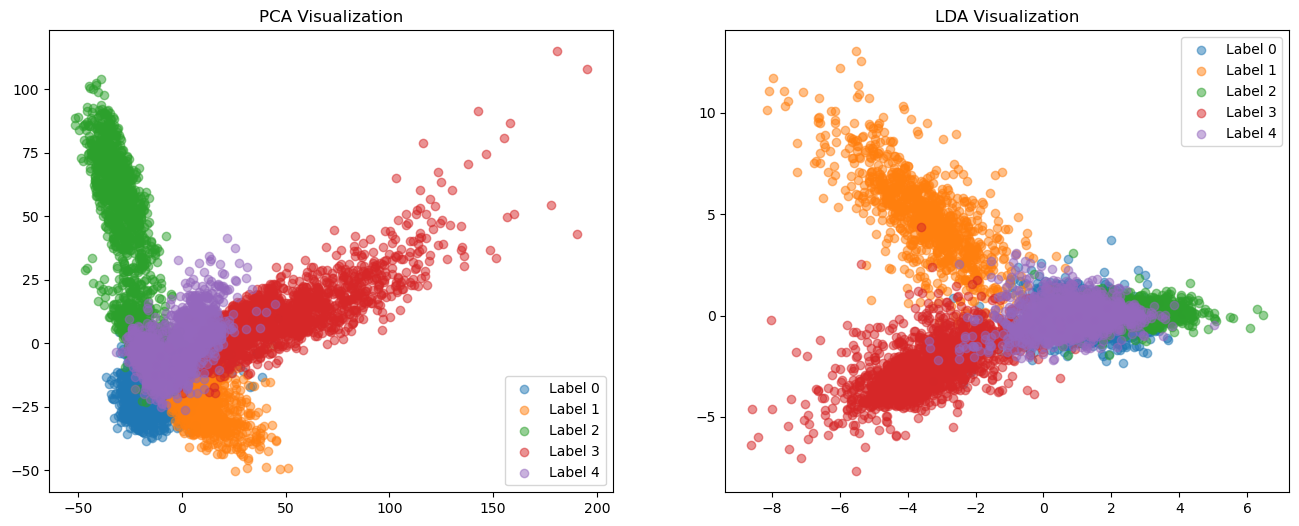

In [20]:
# Reduce the dimensionality of the embeddings to 2D
embeddings_pca_reduced, embeddings_lda_reduced = reduce_to_2d(embeddings, y_test)

# Plot the 2D visualization
plot_2d(embeddings_pca_reduced, embeddings_lda_reduced, y_test)

#### Summary

In the PCA plot, the labels are relatively well-separated, with clear distinctions between 5 labels. However, in the LDA plot, there is significant overlap between label 2, 4, and 0, with Label 0 and Label 4 almost completely overlapping.

### K-Means Clustering

In [21]:
# Perform K-Means clustering on the embeddings
def kmeans_clustering(embeddings):
  # Init a KMeans model with 5 clusters
  kmeans = KMeans(n_clusters=5, random_state=42)
  clusters = kmeans.fit_predict(embeddings)

  return clusters


# Remap the cluster IDs to the actual labels
# K-Means assigns cluster IDs arbitrarily, so the cluster IDs may not match the actual labels
# This function remaps the cluster IDs to the actual labels based on the majority vote
def remap_cluster_ids(clusters, y):
  cluster_id_label_map = {}

  # For each cluster id, map it to the label with the most samples
  for cluster_id in np.unique(clusters):
    cluster_samples = y[clusters == cluster_id]
    most_common_label = np.bincount(cluster_samples).argmax()
    cluster_id_label_map[cluster_id] = most_common_label

  print(f"Cluster IDs remapped to labels: {cluster_id_label_map}")

  # Remap the cluster IDs to the actual labels
  remapped_cluster_ids = np.array([cluster_id_label_map[cluster_id] for cluster_id in clusters])

  return remapped_cluster_ids


# Plot the clusters with PCA
def plot_clusters_with_pca(pca_reduced, clusters):
  plt.figure(figsize=(8, 6))

  for cluster_id in np.unique(clusters):
    plt.scatter(
        pca_reduced[clusters == cluster_id, 0],
        pca_reduced[clusters == cluster_id, 1],
        label=f'Label {cluster_id}',
        alpha=0.5
    )

  plt.title("PCA with K-Means Clusters")
  plt.legend()
  plt.show()

Cluster IDs remapped to labels: {0: 4, 1: 2, 2: 1, 3: 0, 4: 3}


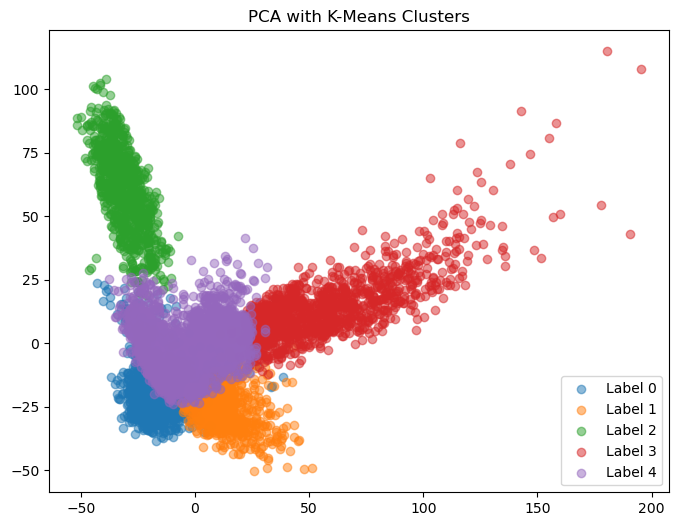

In [22]:
# Perform K-Means clustering on the embeddings
kmeans_clusters = kmeans_clustering(embeddings)

# Remap the cluster IDs to the actual labels
kmeans_clusters = remap_cluster_ids(kmeans_clusters, y_test)

# Plot the clusters with PCA
plot_clusters_with_pca(embeddings_pca_reduced, kmeans_clusters)

In [23]:
# Pick random samples from each cluster and display the original image
def show_images_by_cluster(X, cluster_labels, cluster_id, num_images=60):
  # Get the indices of samples in the cluster
  all_idx = np.where(cluster_labels == cluster_id)[0]

  # Randomly sample a subset of the indices
  sampled_idx = np.random.choice(all_idx, size=num_images, replace=False)

  # Create a plot with the sampled images
  fig, axes = plt.subplots(3, num_images // 3, figsize=(30, 6))
  axes = axes.flatten()

  for i, img_idx in enumerate(sampled_idx):
    axes[i].imshow(X.iloc[img_idx].values.reshape(28, 28), cmap='gray')
    axes[i].axis('off')

  plt.suptitle(f"Label {cluster_id}")
  plt.tight_layout()
  plt.show()



Label 0


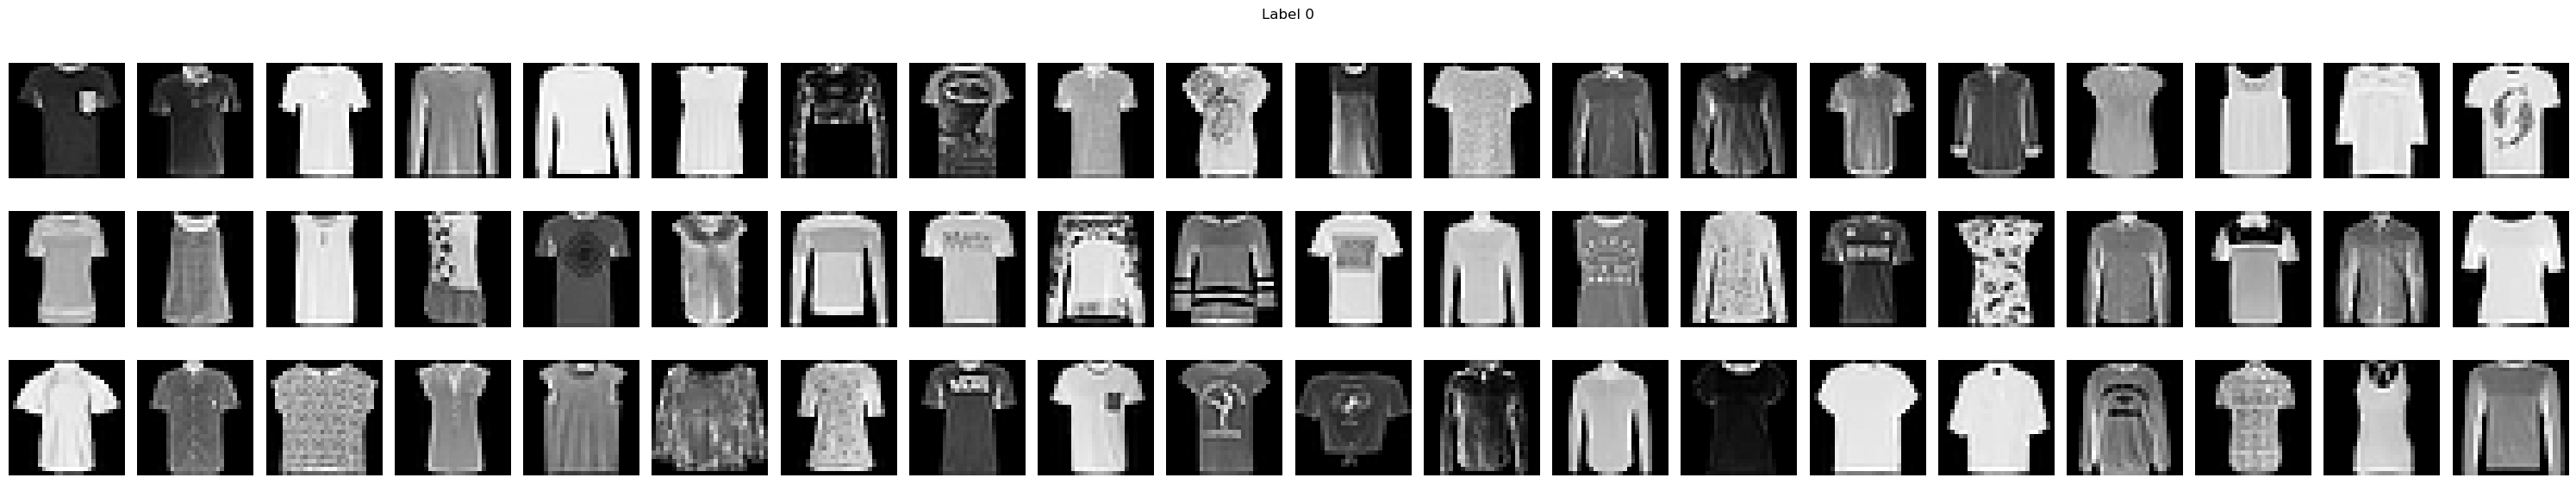



Label 1


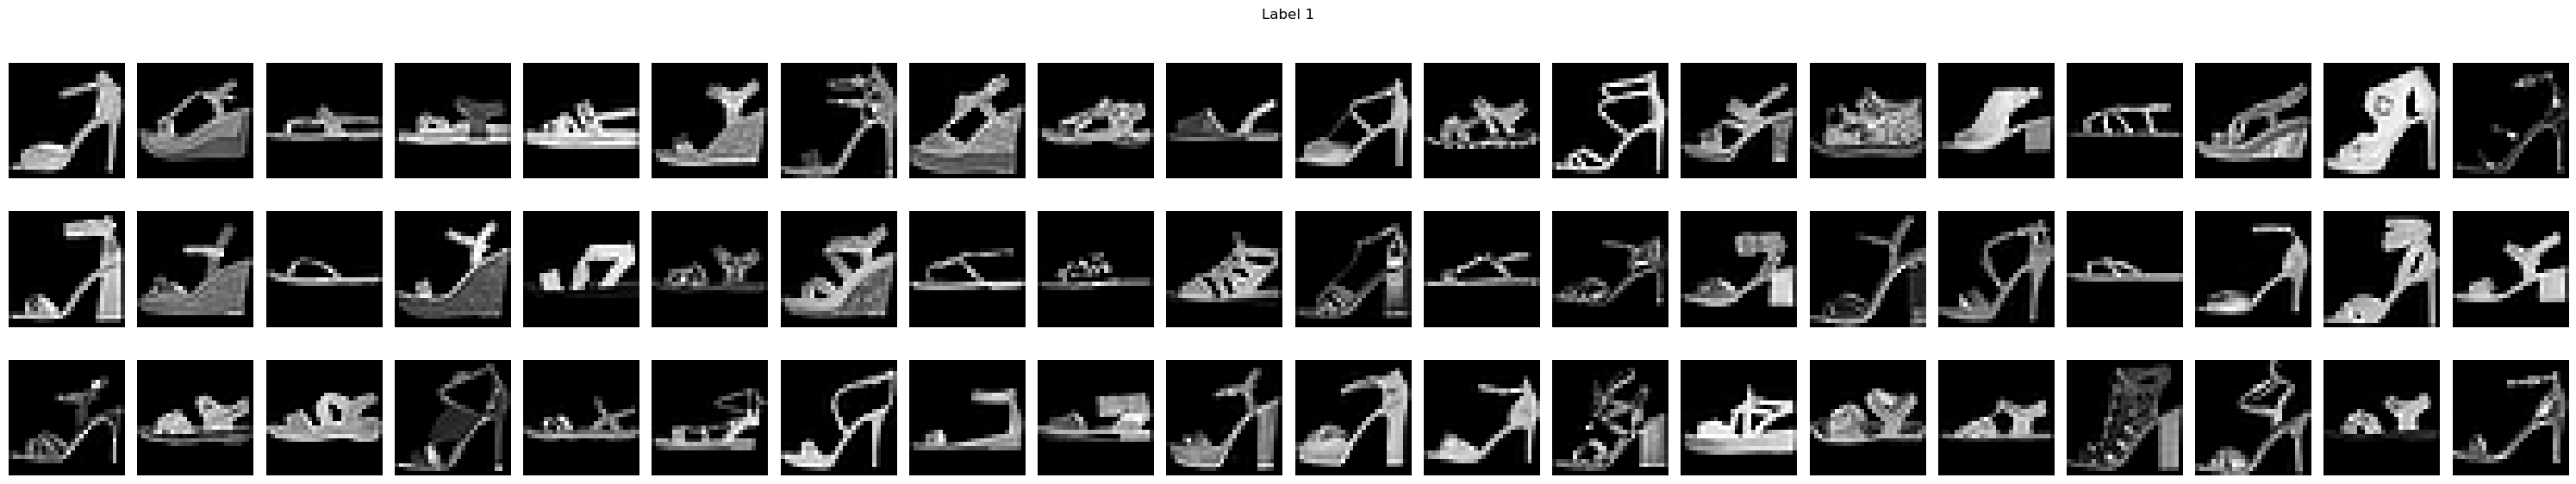



Label 2


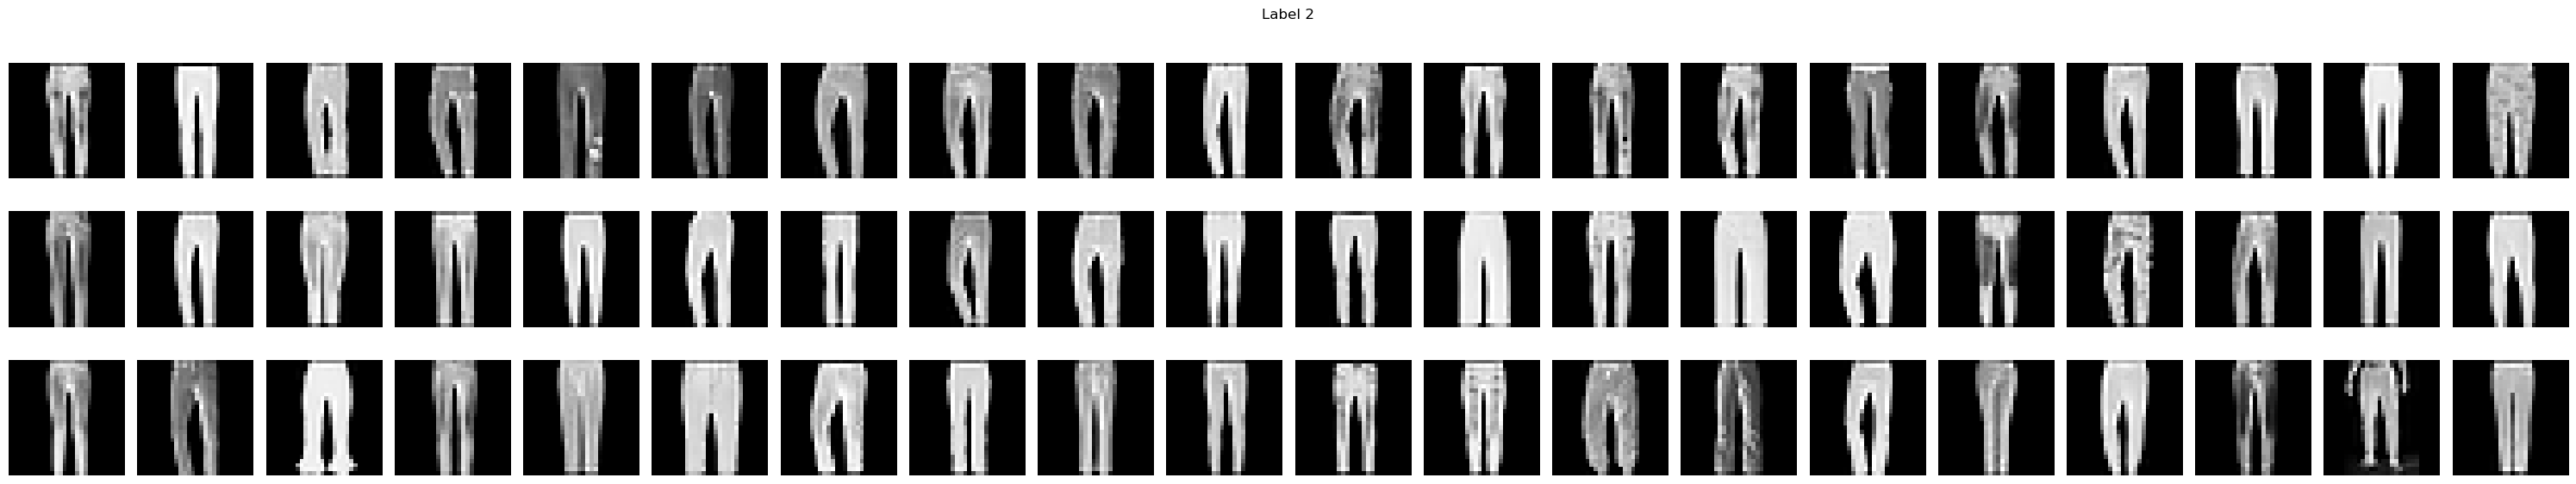



Label 3


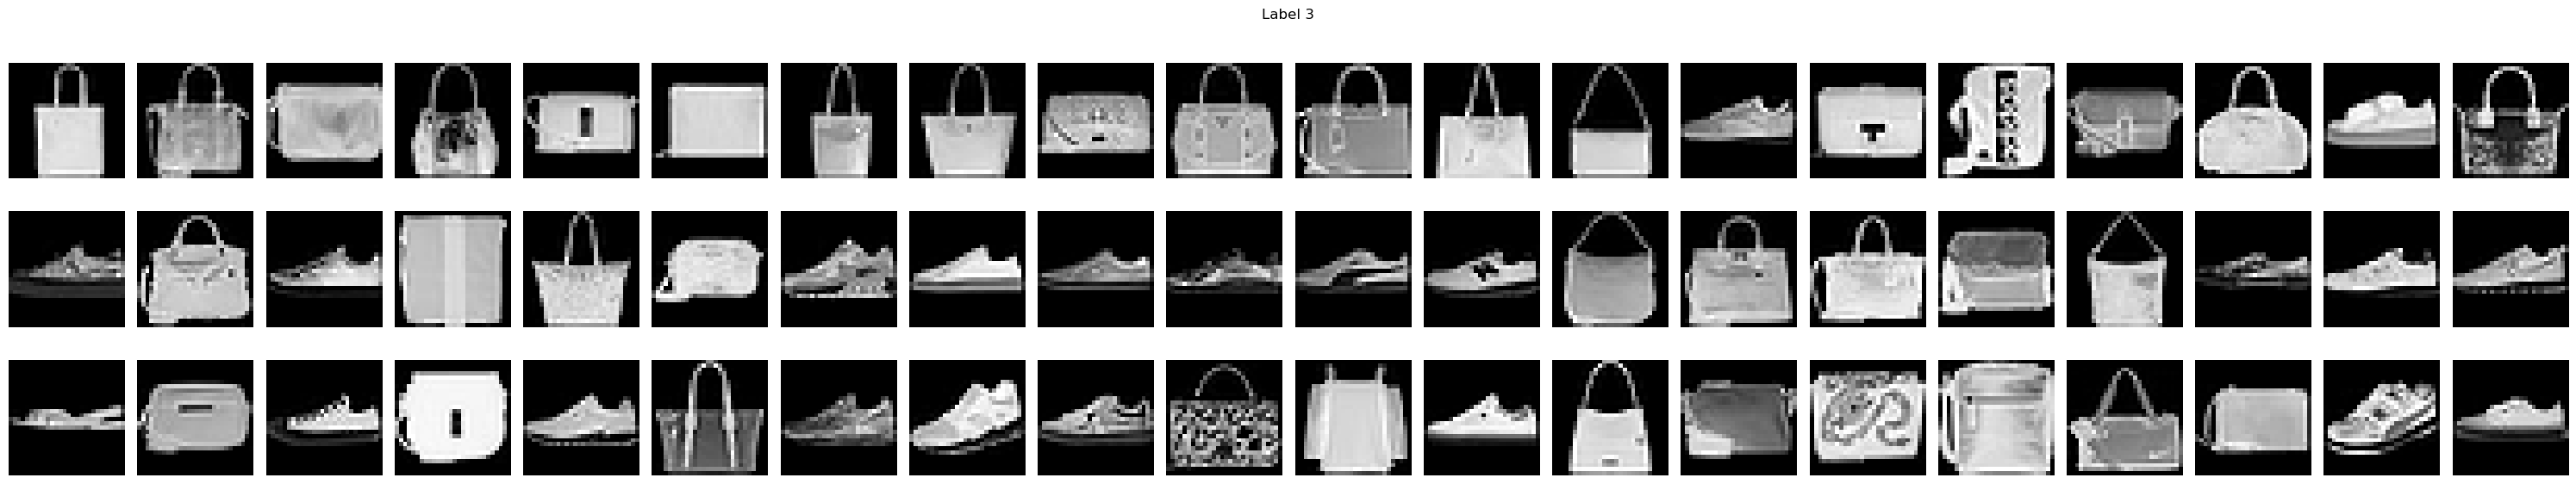



Label 4


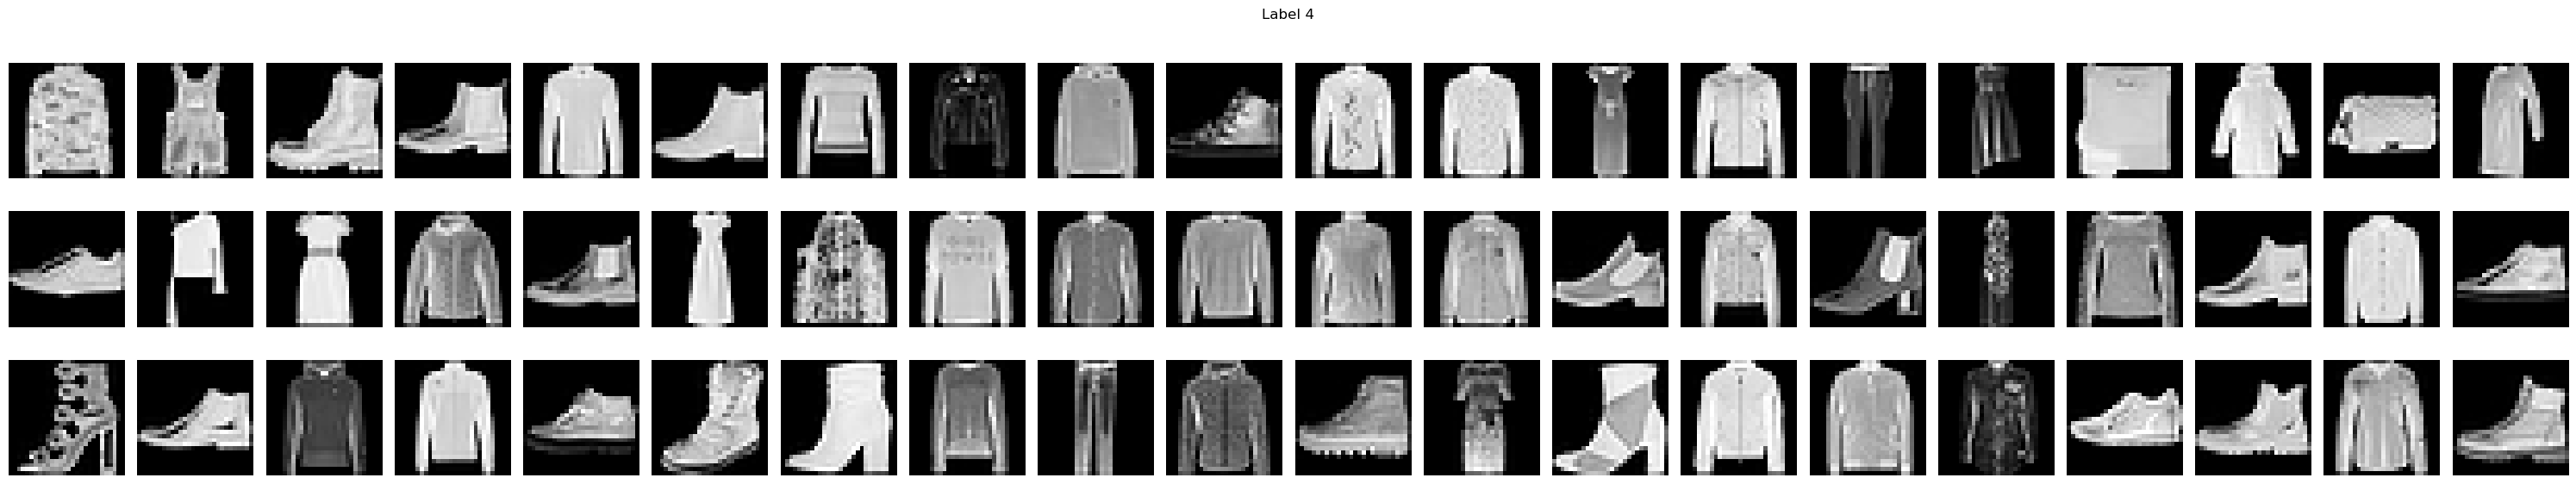

In [24]:
# Display random samples from each cluster
for cluster_id in range(5):
  print(f"\n\nLabel {cluster_id}")
  show_images_by_cluster(X_test, kmeans_clusters, cluster_id)

### Conclusion

By observing the sample images corresponding to the 5 labels above, we can infer:

- Label 0: Tops and T-shirts
- Label 1: Sandals, high heels, and slippers
- Label 2: Pants (very clear, with no exceptions)
- Label 3: Sneakers and bags
- Label 4: Dresses, shirts, boots, and coats